In [ ]:
from google.colab import files
uploaded = files.upload()


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")

In [ ]:
df=pd.read_csv("reviews_data.csv")

In [ ]:
df.head()

,id,name,location,Date,Rating,Review,Image_Links
0,1,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,2,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,3,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,4,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,5,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...


In [ ]:
df.shape

(850, 7)

In [ ]:
df['Review'] = df['Review'].astype(str).str.lower()

**EDA**

In [ ]:
ax=df['Rating'].value_counts().sort_index()
print(ax)

Rating
1.0    451
2.0     99
3.0     33
4.0     39
5.0     83
Name: count, dtype: int64


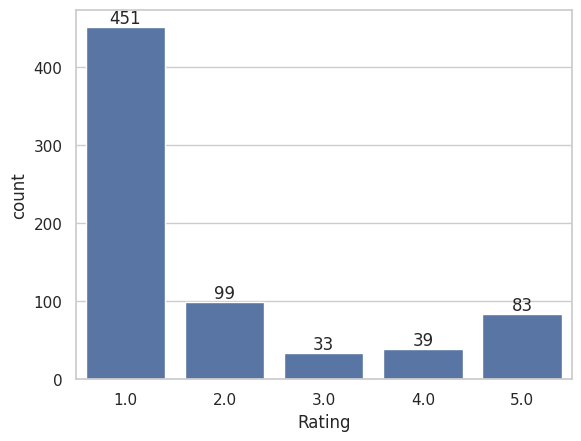

In [ ]:
import matplotlib.pyplot as plt
ax=sns.countplot(x='Rating',data=df)
plt.title='Ratings count'
for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
sample=df['Review'][50]
print(sample)

miserable customer service, executive department and website/apps. we have a starbucks account where our payment method is linked to our account so we may earn stars for rewards. the starbucks cafe we go to is in a market32/price chopper grocery store. previously, every now and then purchase history shows with the $ amount, but no stars, shows as 0.0 earned. then this started happening on a frequent basis. called customer service, most speak english with a very broken accent. explained the issue. 


Simple **NLTK**

In [ ]:
import nltk
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [ ]:
tokens = nltk.word_tokenize(sample)
tokens[:10]

['miserable',
 'customer',
 'service',
 ',',
 'executive',
 'department',
 'and',
 'website/apps',
 '.',
 'we']

In [ ]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('miserable', 'JJ'),
 ('customer', 'NN'),
 ('service', 'NN'),
 (',', ','),
 ('executive', 'NN'),
 ('department', 'NN'),
 ('and', 'CC'),
 ('website/apps', 'NN'),
 ('.', '.'),
 ('we', 'PRP')]

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia=SentimentIntensityAnalyzer()

In [ ]:
df.columns


Index(['id', 'name', 'location', 'Date', 'Rating', 'Review', 'Image_Links'], dtype='object')

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    review = row['Review']
    myid = row['id']
    res[myid] = sia.polarity_scores(review)

  0%|          | 0/850 [00:00<?, ?it/s]

**VADER MODEL**

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'id'})
vaders = vaders.merge(df, how='left')

In [ ]:
vaders.head()

,id,neg,neu,pos,compound,name,location,Date,Rating,Review,Image_Links
0,1,0.000,0.797,0.203,0.8991,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,amber and ladonna at the starbucks on southwes...,['No Images']
1,2,0.099,0.755,0.145,0.7766,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the starbucks by the fire station on 436...,['No Images']
2,3,0.087,0.767,0.145,0.5242,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,i just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,4,0.053,0.682,0.265,0.9698,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,me and my friend were at starbucks and my card...,['No Images']
4,5,0.000,0.669,0.331,0.9793,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,i’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...


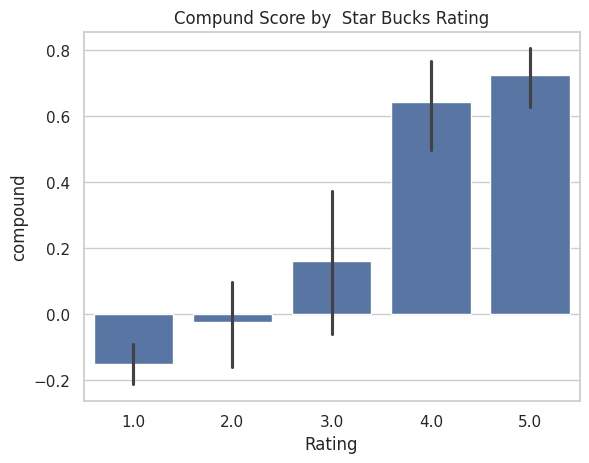

In [ ]:
ax = sns.barplot(data=vaders, x='Rating', y='compound')
ax.set_title('Compund Score by  Star Bucks Rating')
plt.show()

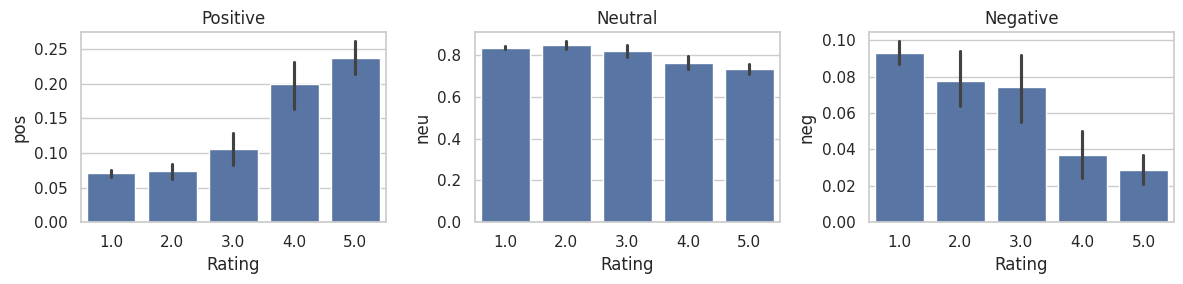

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

**RoBERTa Model (HUGGING FACE MODEL)**

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
print(sample)
sia.polarity_scores(sample)

miserable customer service, executive department and website/apps. we have a starbucks account where our payment method is linked to our account so we may earn stars for rewards. the starbucks cafe we go to is in a market32/price chopper grocery store. previously, every now and then purchase history shows with the $ amount, but no stars, shows as 0.0 earned. then this started happening on a frequent basis. called customer service, most speak english with a very broken accent. explained the issue. 


{'neg': 0.112, 'neu': 0.864, 'pos': 0.024, 'compound': -0.8146}

In [ ]:
encoded_text = tokenizer(sample, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': np.float32(0.6227304), 'roberta_neu': np.float32(0.3182422), 'roberta_pos': np.float32(0.05902742)}


**we can see that RoBERTa model is giving more accurate results for the sentene being negative(0.6) than just VADER model(0.11)**


In [ ]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        review = row['Review']
        myid = row['id']
        vader_result = sia.polarity_scores(review)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(review)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/850 [00:00<?, ?it/s]

In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'id'})
results_df = results_df.merge(df, how='left')


Sorting the reviews by the roberta_pos score — which  represents the positive sentiment score from the RoBERTa model.

In [68]:
results_df.query('Rating == 1') \
    .sort_values('roberta_pos', ascending=False)['Review'].values[50]


'i came back to oklahoma city due to a business meeting and to visit my family. while visiting a starbucks location in oklahoma city, ok at 200 s oklahoma city, ok 73104, i was threatened verbally as well as physically by an employee. i am a long-time daily customer of starbucks. i would say i visit a location at least 335 days out of 365 per year. on the morning of april 5th, 2022, i went in to purchase my usual daily cup of coffee. i decided to purchase a protein box and a cheese and fruit box as well. while waiting in a fairly long line i arrived at the counter in which i were greeted by a young lady named **. my order was placed for a venti sized blonde roast of brewed coffee, including eight packages of agave, sugar free vanilla, cream and the two boxes discussed above.'

As we can see, the model is able to represent a mismatch between the customer's tone and context. Here its a 1 star rating but the customer is actually being positive

In [ ]:
results_df.query('Rating == 5') \
    .sort_values('roberta_neg', ascending=False)['Review'].values[20]

'i wish their menu had more selections. also some of the staff need to listen to their customers! i truly enjoy the chi tea and a few of the other things on the menu.'

**Comparing with VADER MODEL**

In [ ]:
results_df.query('Rating== 1') \
    .sort_values('vader_pos', ascending=False)['Review'].values[0]

"i have been a loyal customer for 10+ yrs...however, i've won multiple prizes on the most recent starbucks app game but the prizes don't get delivered to my account. customer service didn't know how to help. i've spent money to play the game trying to win prizes but never see the prizes that i've already won. fraud!!! don't fall for it screenshots don't help either. it needs the reward to be displayed as in barcode scan. i'm not spending in starbucks anymore. its brand of integrity is very poor."

use a simpler and easier way "transformers"

In [ ]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
sent_pipeline('i wish their menu had more selections. also some of the staff need to listen to their customers! i truly enjoy the chi tea and a few of the other things on the menu.')

[{'label': 'POSITIVE', 'score': 0.9990530610084534}]

**Applying this to the whole data**

In [ ]:
df['Sentiment'] = df['Review'].apply(lambda x: sent_pipeline(x)[0]['label'])


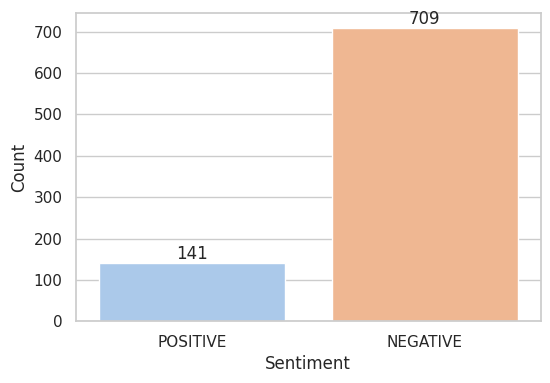

In [74]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x='Sentiment', data=df, palette='pastel',hue='Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
for bars in ax.containers:
  ax.bar_label(bars)

**shows that most of the reviews are negative**